In [5]:
# Importing libraries for Data Manipulation
import pandas as pd
import numpy as np

# Importing libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing libraries for Deep Learning
import torch
import torch.nn as nn
import torch.optim as optim

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/DataSets/NASDAQ_Historical_Prices.csv'

df = pd.read_csv(file_path)

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,4160.029785,4160.959961,4131.790039,4143.069824,4143.069824,1738820000
1,2014-01-03,4148.560059,4152.959961,4124.959961,4131.910156,4131.910156,1667480000
2,2014-01-06,4137.029785,4139.779785,4103.750000,4113.680176,4113.680176,2292840000
3,2014-01-07,4128.569824,4158.180176,4126.479980,4153.180176,4153.180176,2278220000
4,2014-01-08,4154.279785,4171.750000,4145.000000,4165.609863,4165.609863,2345220000


Visualize the Stock Trends Using Line Chart

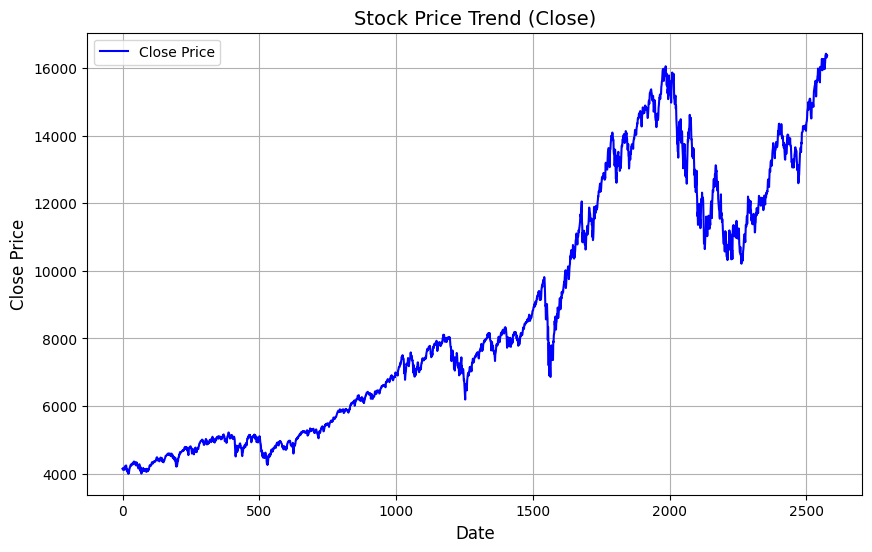

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title('Stock Price Trend (Close)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


Seasonal Patterns (Monthly and Yearly Trends)

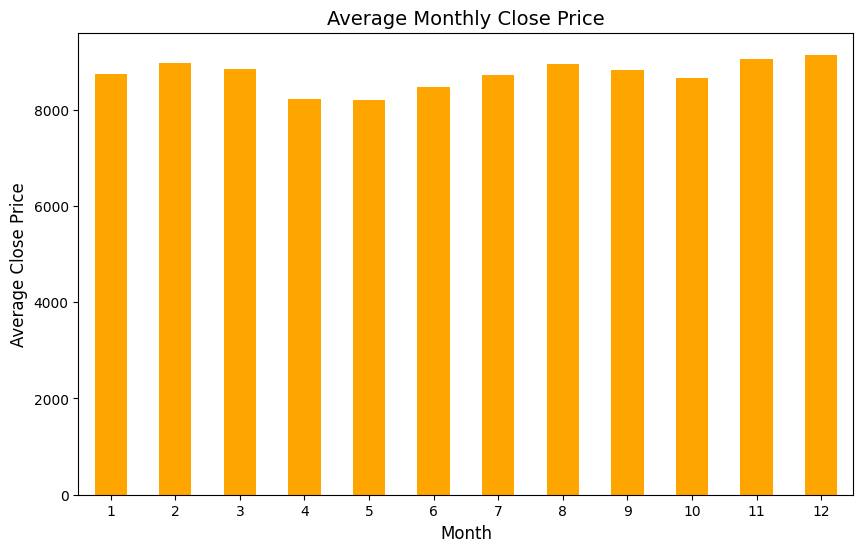

In [15]:
# Extract the month from the 'Date' column
df['Month'] = df.index.month

# Calculate the average 'Close' price for each month
monthly_avg = df.groupby('Month')['Close'].mean()

# Plot the monthly average close prices
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='orange')
plt.title('Average Monthly Close Price', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Close Price', fontsize=12)
plt.xticks(rotation=0)
plt.show()


 Correlation Heatmap

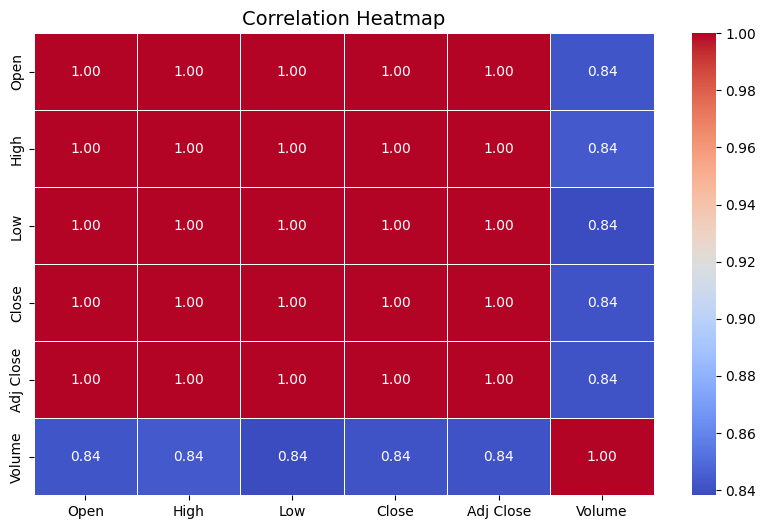

In [8]:
# Calculate the correlation matrix
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap', fontsize=14)
plt.show()


Box Plot to Identify Outliers in Stock Prices

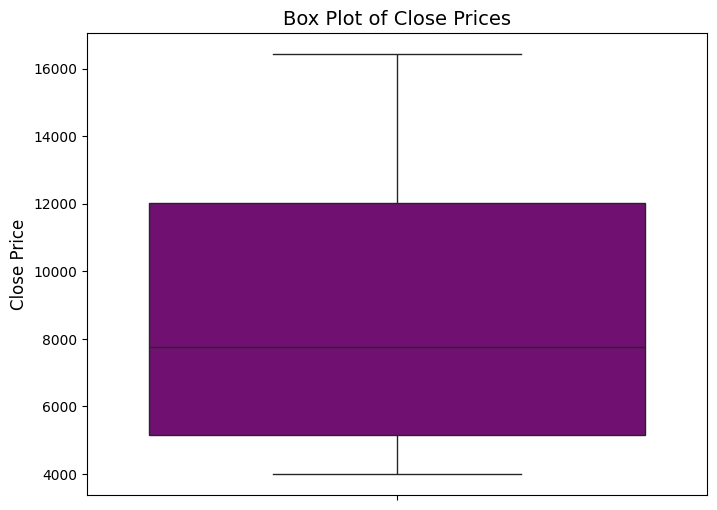

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Close'], color='purple')
plt.title('Box Plot of Close Prices', fontsize=14)
plt.ylabel('Close Price', fontsize=12)
plt.show()


Additional Trend Analysis - Rolling Mean

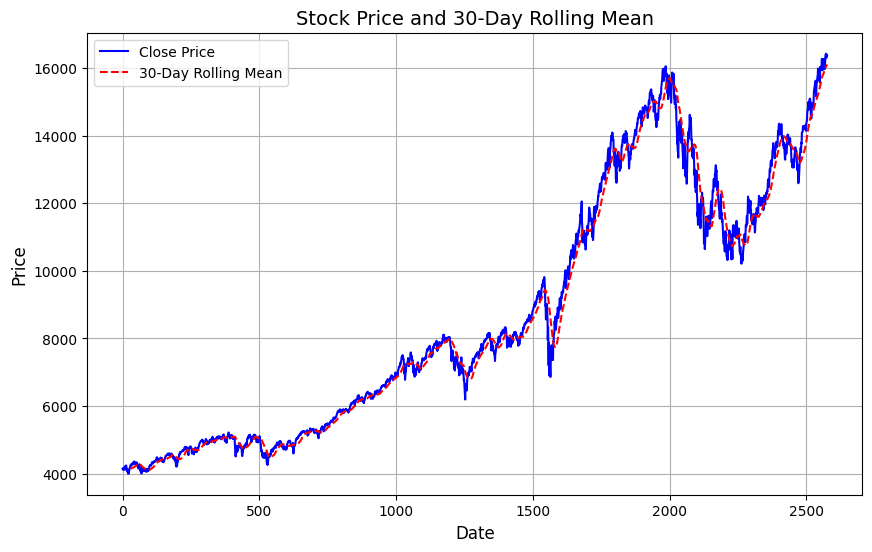

In [10]:
# Calculate the rolling mean with a window of 30 days
df['Rolling Mean (30 days)'] = df['Close'].rolling(window=30).mean()

# Plot the closing price and rolling mean
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['Rolling Mean (30 days)'], label='30-Day Rolling Mean', color='red', linestyle='--')
plt.title('Stock Price and 30-Day Rolling Mean', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
